# Fraud Loan Prediction

## whether to give loan to a person or not, on the basis of the data information we got.

### Let's start, we are importing some important libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud_loan_Prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

## EDA

## Searching for missing values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### from above we can see that some values are missing

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### to see the datatype of each attribute & count of all unique values

In [8]:
x = df.drop(["Loan_ID"],axis=1)
y= df["Loan_ID"]

for attr in x.columns:
    print("\n", attr)
    print(x[attr].value_counts())


 Gender
Male      489
Female    112
Name: Gender, dtype: int64

 Married
Yes    398
No     213
Name: Married, dtype: int64

 Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

 ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

 CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

 LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

 Loan_Amount_Term
360.0    512
180.0     44
48

### Now we will going to see the output Loan_Status attribute and their counts

In [9]:
print(np.unique(df["Loan_Status"], return_counts=True))
print(df["Loan_Status"].value_counts())

(array(['N', 'Y'], dtype=object), array([192, 422], dtype=int64))
Y    422
N    192
Name: Loan_Status, dtype: int64


##### From above we can say, the output Loan_Status having 2 values. We will convert to 0 & 1

In [10]:
df["Loan_Status"] = df["Loan_Status"].map({"N":0, "Y":1})

print(np.unique(df["Loan_Status"], return_counts=True))
print(df["Loan_Status"].value_counts())


(array([0, 1], dtype=int64), array([192, 422], dtype=int64))
1    422
0    192
Name: Loan_Status, dtype: int64


### From above, after converting we can see

In [11]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

##### so male is more than females, we are going to treat missing values with male

In [12]:
data=[df]

for dataset in data:
    df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
print(df["Gender"].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


### same for other attributes, those who have missing values

In [13]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

##### here we replace with Yes for missing values

In [14]:
data=[df]

for dataset in data:
    df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
print(df["Married"].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


In [15]:
print(df["Dependents"].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


##### here replace with 0

In [16]:
data=[df]
for dataset in data:
    df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
print(df["Dependents"].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [17]:
print(df["Self_Employed"].value_counts())


No     500
Yes     82
Name: Self_Employed, dtype: int64


In [18]:
data = [df]
for dataset in data:
    df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
print(df["Self_Employed"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


##### For Loan Amount we will use the average value

In [19]:
data=[df]

for dataset in data:
    mean = df["LoanAmount"].mean()
    std = df["LoanAmount"].std()
    is_null = dataset["LoanAmount"].isnull().sum()
    
# we will calculate random numbers from above
    rand_amount = np.random.randint(mean-std, mean+std, size=is_null)
    
    miss_amount = df["LoanAmount"].copy()
    miss_amount[np.isnan(miss_amount)] = rand_amount
    df["LoanAmount"] = miss_amount
    df["LoanAmount"] = df["LoanAmount"].astype(int)
print(df["LoanAmount"].describe())

count    614.000000
mean     145.511401
std       84.540920
min        9.000000
25%      100.000000
50%      127.000000
75%      166.750000
max      700.000000
Name: LoanAmount, dtype: float64


##### Let's do same with Loan Amount Term

In [20]:
data=[df]
for dataset in data:
    mean=df["Loan_Amount_Term"].mean()
    std=df["Loan_Amount_Term"].std()
    is_null=dataset["Loan_Amount_Term"].isnull().sum()
    
    rand_amount_term = np.random.randint(mean-std, mean+std, size=is_null)
    
    miss_amount_term = df["Loan_Amount_Term"].copy()
    miss_amount_term[np.isnan(miss_amount_term)] = rand_amount_term
    df["Loan_Amount_Term"] = miss_amount_term
    df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype(int)
print(df["Loan_Amount_Term"].describe())

count    614.000000
mean     341.876221
std       64.630971
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


##### Let's do same with Credit History

In [21]:
data=[df]
for dataset in data:
    mean=df["Credit_History"].mean()
    std=df["Credit_History"].std()
    is_null=dataset["Credit_History"].isnull().sum()
    
    credit_history= np.random.randint(mean-std,mean+std,size=is_null)
    
    miss_credit = df["Credit_History"].copy()
    miss_credit[np.isnan(miss_credit)]=credit_history
    df["Credit_History"] = miss_credit
    df["Credit_History"] =df["Credit_History"].astype(int)
print(df["Credit_History"].describe())

count    614.000000
mean       0.773616
std        0.418832
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int32  
 9   Loan_Amount_Term   614 non-null    int32  
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 55.3+ KB


##### As we can see from above many attributes are having object data type, so we have to encode it from using onehot encoder than we will combine all those columns as one column for better performance 

In [23]:
from sklearn.preprocessing import OneHotEncoder

Gender = pd.get_dummies(df["Gender"],prefix="Gender")
Married = pd.get_dummies(df["Married"],prefix="Married")
Dependents = pd.get_dummies(df["Dependents"],prefix="Dependents")
Education = pd.get_dummies(df["Education"],prefix="Education")
Self_Employed = pd.get_dummies(df["Self_Employed"],prefix="Self_Employed")
Property_Area = pd.get_dummies(df["Property_Area"],prefix="Property_Area")

all_data = [df,Gender,Married,Dependents,Education,Self_Employed,Property_Area]

loan_data = pd.concat(all_data,axis=1)
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,109,360,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,...,0,1,0,1,0,1,0,0,0,1


##### As we can see new data have 28 columns in which some columns are unwanted, so will drop that columns. Including above columns those we have converted early with the help of Onehot Encoding

In [24]:
final_loan = loan_data.drop(columns=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"])
final_loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,109,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128,360,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66,360,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120,360,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [25]:
final_loan.shape

(614, 21)

In [26]:
final_loan.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Data visualization

##### Now we are going to check the correlation new data, if any

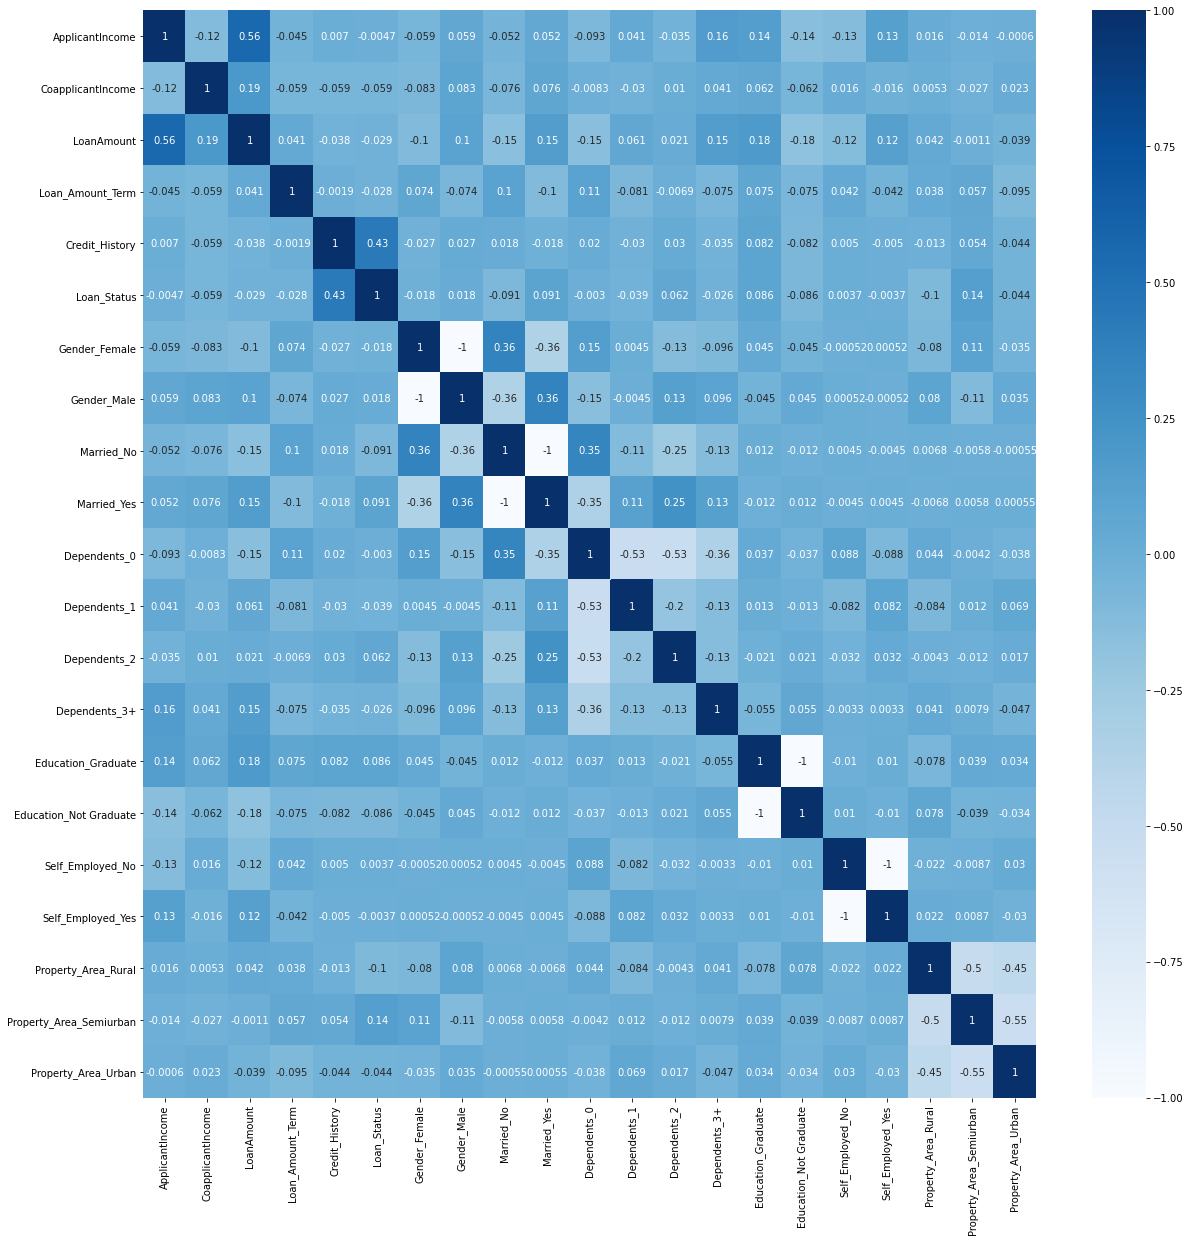

In [27]:
corrmat = final_loan.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_loan[top_corr_features].corr(),annot=True,cmap="Blues")

[Text(1, 0.5, 'Dependents_0'),
 Text(1, 1.5, 'Gender_Female'),
 Text(1, 2.5, 'Married_No'),
 Text(1, 3.5, 'Self_Employed_No'),
 Text(1, 4.5, 'Education_Not Graduate'),
 Text(1, 5.5, 'Property_Area_Rural'),
 Text(1, 6.5, 'Dependents_2'),
 Text(1, 7.5, 'Gender_Male'),
 Text(1, 8.5, 'Married_Yes'),
 Text(1, 9.5, 'Self_Employed_Yes'),
 Text(1, 10.5, 'Property_Area_Urban'),
 Text(1, 11.5, 'Education_Graduate'),
 Text(1, 12.5, 'Loan_Amount_Term'),
 Text(1, 13.5, 'Property_Area_Semiurban'),
 Text(1, 14.5, 'Credit_History'),
 Text(1, 15.5, 'Loan_Status'),
 Text(1, 16.5, 'Dependents_1'),
 Text(1, 17.5, 'CoapplicantIncome'),
 Text(1, 18.5, 'Dependents_3+'),
 Text(1, 19.5, 'ApplicantIncome'),
 Text(1, 20.5, 'LoanAmount')]

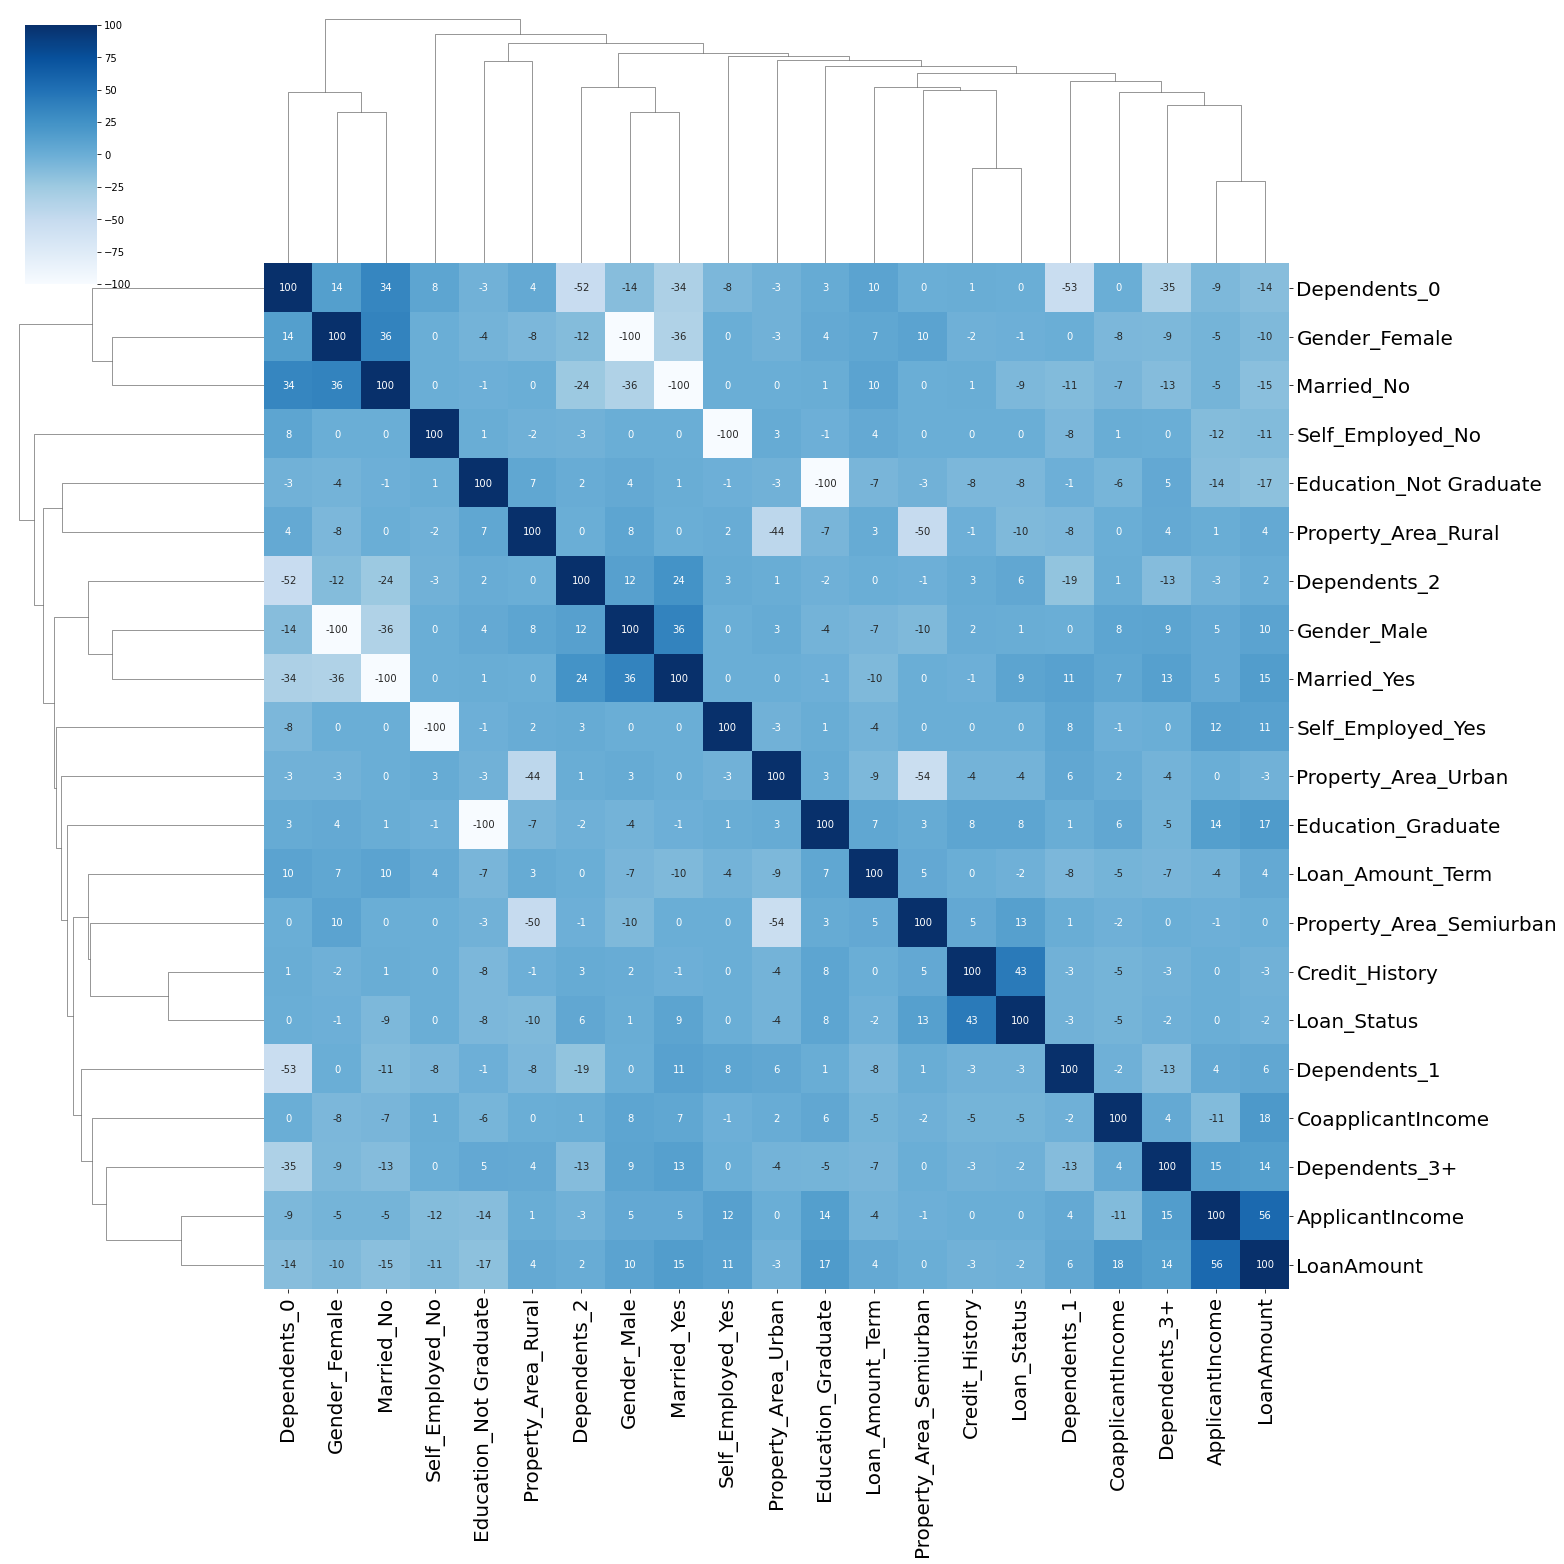

In [28]:
corr = final_loan.corr().mul(100).astype(int)
g=sns.clustermap(data=corr, annot=True, fmt="d", cmap="Blues",figsize=(20,20))
cmap=sns.diverging_palette(h_neg=500,h_pos=100,s=100,l=0, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(),fontsize=20)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(),fontsize=20)

##### not Highly correlated only Applicant income & Loan Amount have correlation more than 50% 

<Figure size 432x288 with 0 Axes>

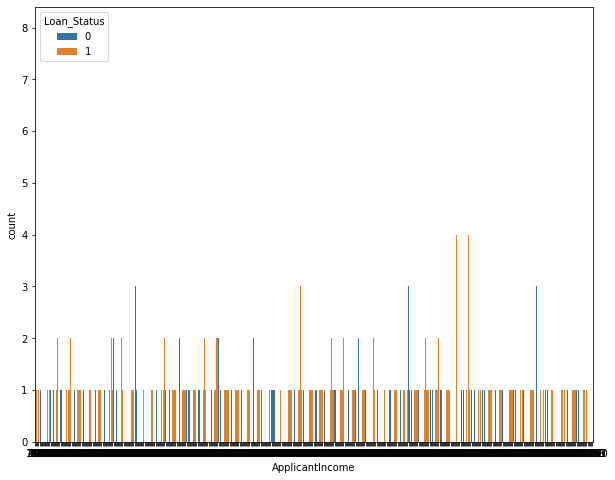

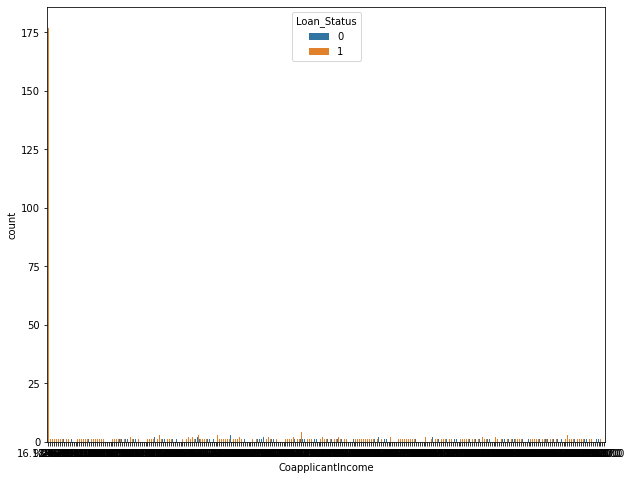

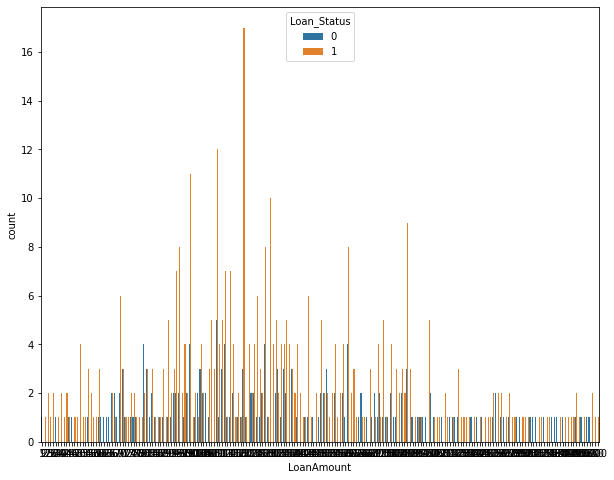

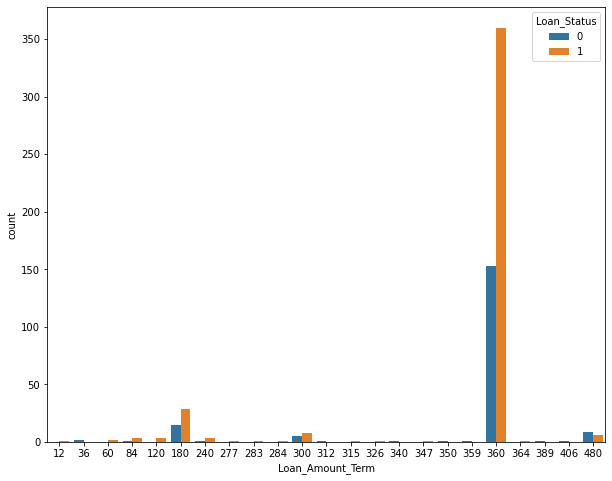

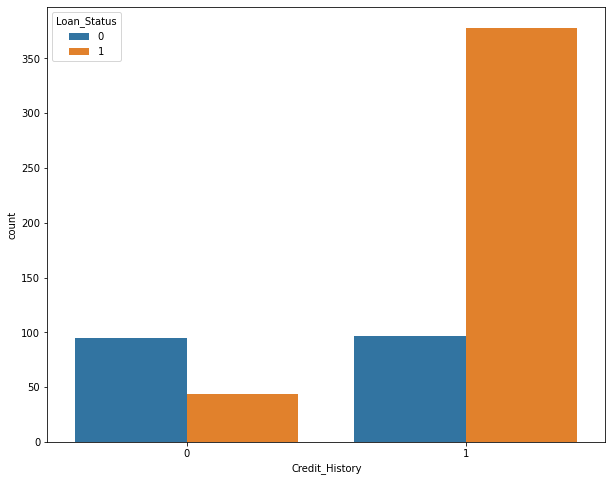

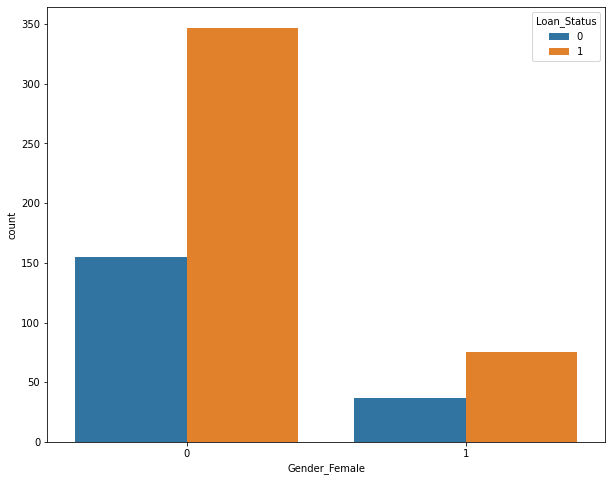

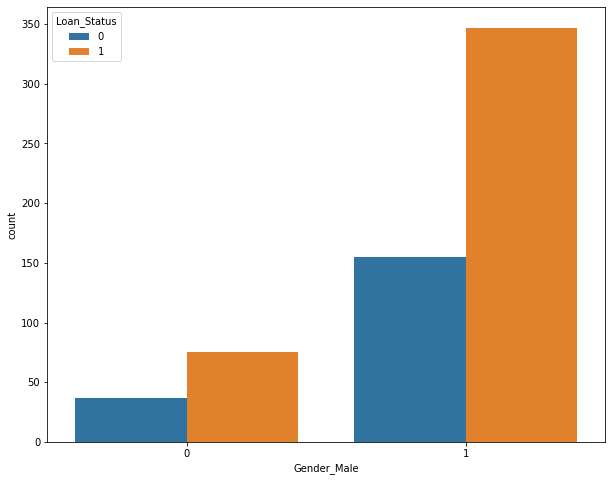

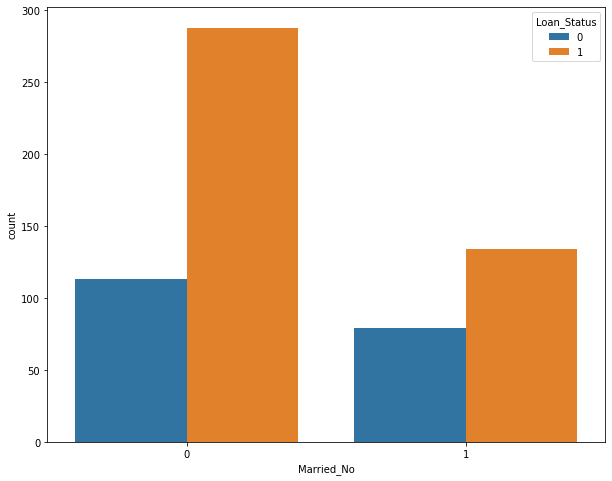

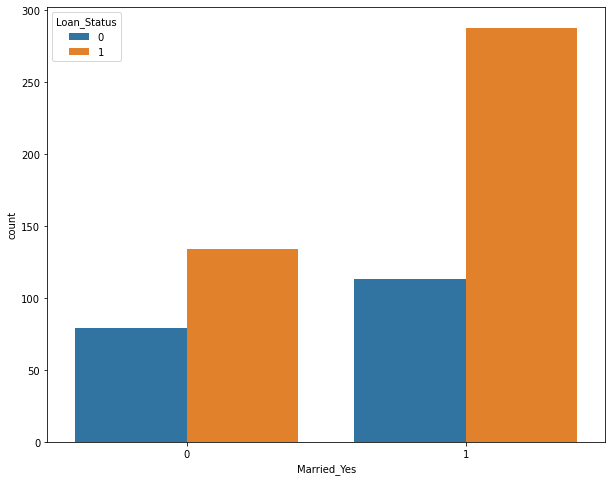

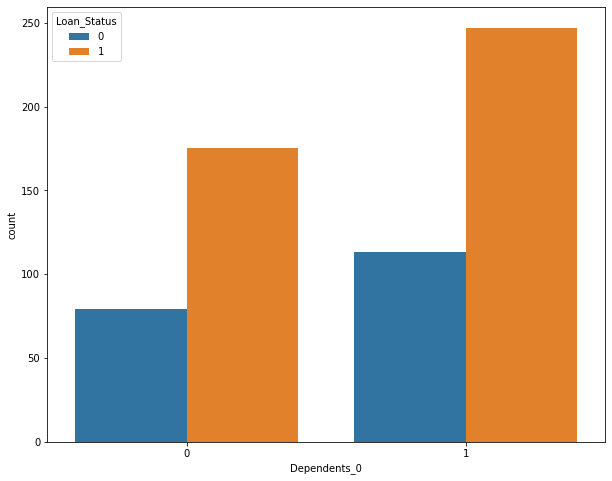

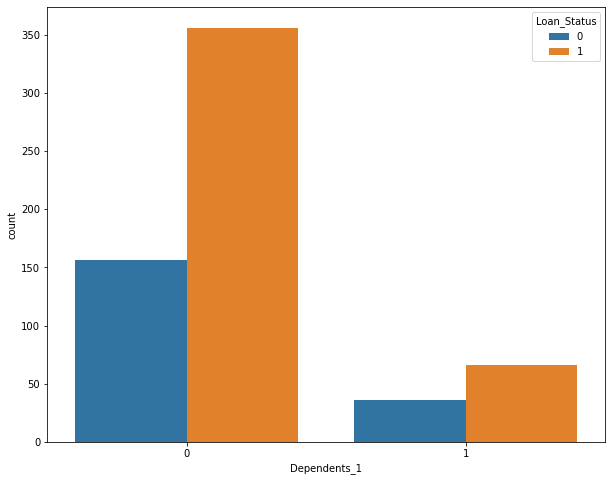

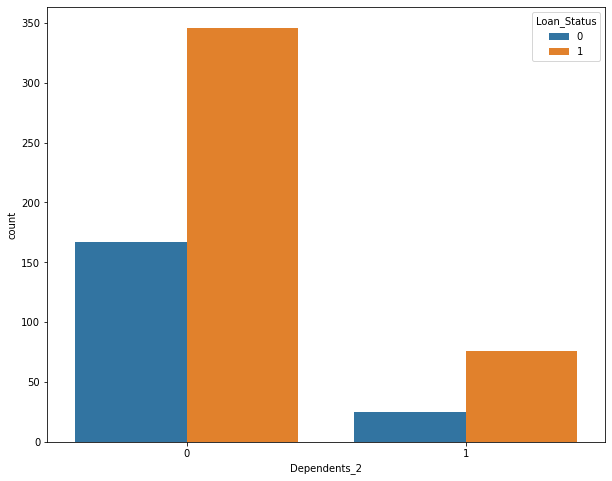

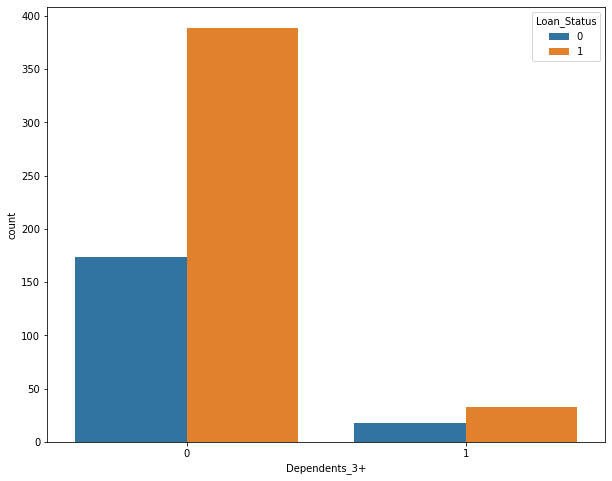

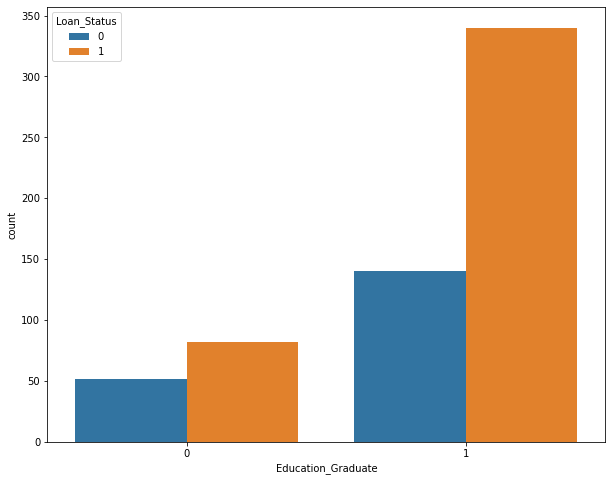

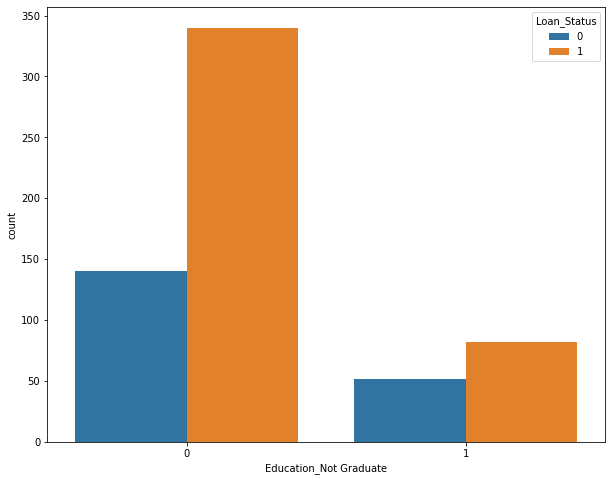

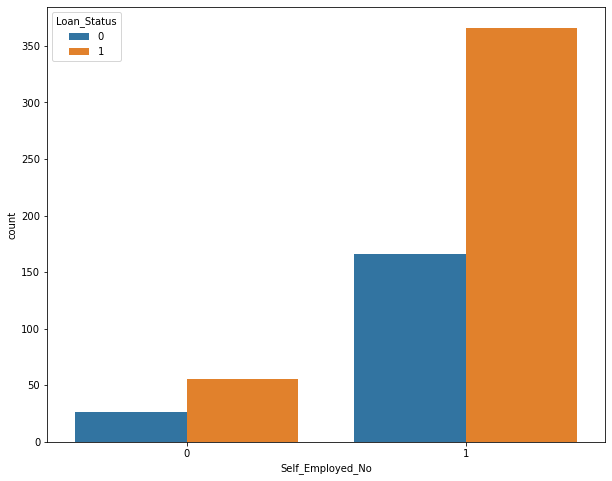

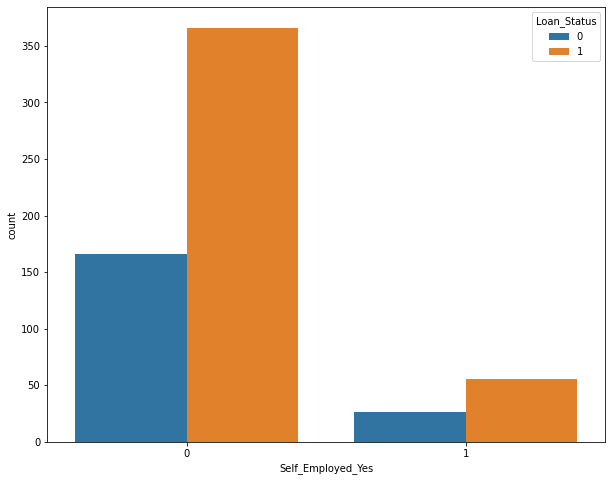

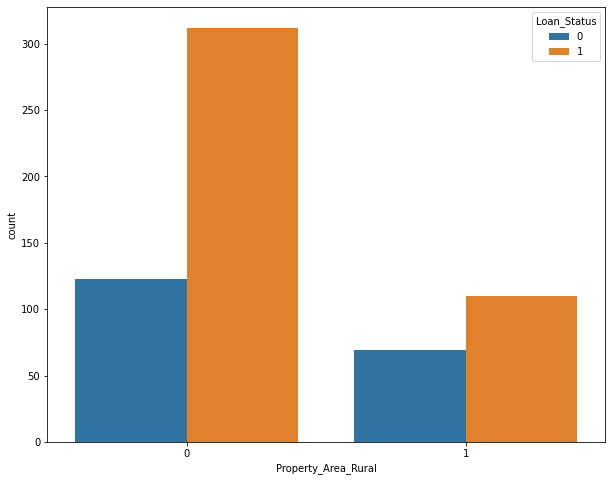

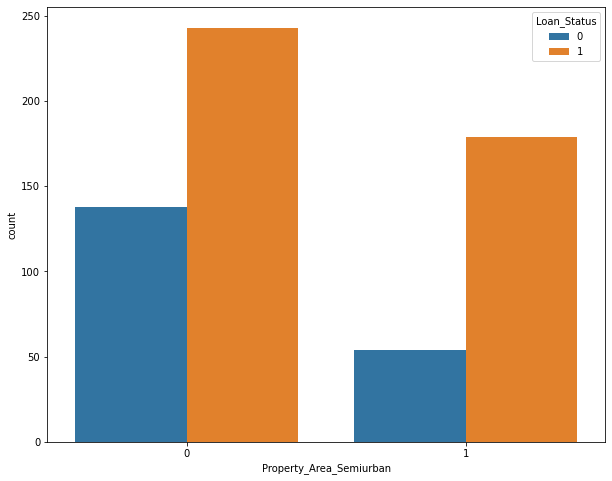

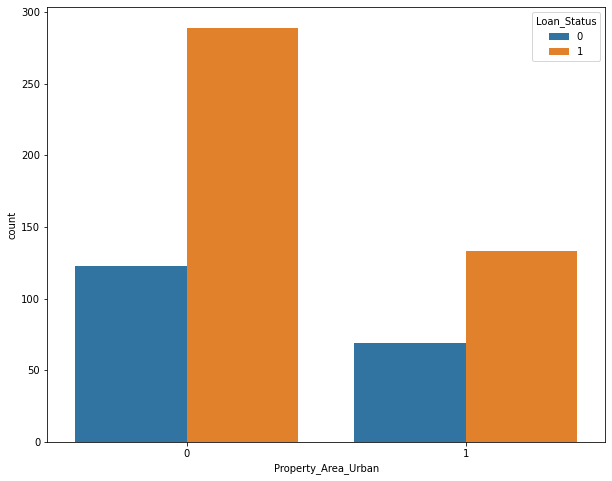

In [29]:
def plot_data(hue,data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ab=sns.countplot(x=final_loan[col],hue=hue,data=final_loan)
hue=final_loan["Loan_Status"]
dataplot=final_loan.drop("Loan_Status",1)
plot_data(hue,dataplot)

##### On the basis of Credit History for acceptance of loan is very imoprtant
##### Unmarried person having high chance for getting loan
##### On the basis of education chances for getting loan for higher education is very high

#####  Now we will check for outliers, if any attributes having outliers then we will treat them, using z score

ApplicantIncome             AxesSubplot(0.125,0.125;0.031x0.755)
CoapplicantIncome          AxesSubplot(0.1622,0.125;0.031x0.755)
LoanAmount                 AxesSubplot(0.1994,0.125;0.031x0.755)
Loan_Amount_Term           AxesSubplot(0.2366,0.125;0.031x0.755)
Credit_History             AxesSubplot(0.2738,0.125;0.031x0.755)
Loan_Status                 AxesSubplot(0.311,0.125;0.031x0.755)
Gender_Female              AxesSubplot(0.3482,0.125;0.031x0.755)
Gender_Male                AxesSubplot(0.3854,0.125;0.031x0.755)
Married_No                 AxesSubplot(0.4226,0.125;0.031x0.755)
Married_Yes                AxesSubplot(0.4598,0.125;0.031x0.755)
Dependents_0                AxesSubplot(0.497,0.125;0.031x0.755)
Dependents_1               AxesSubplot(0.5342,0.125;0.031x0.755)
Dependents_2               AxesSubplot(0.5714,0.125;0.031x0.755)
Dependents_3+              AxesSubplot(0.6086,0.125;0.031x0.755)
Education_Graduate         AxesSubplot(0.6458,0.125;0.031x0.755)
Education_Not Graduate   

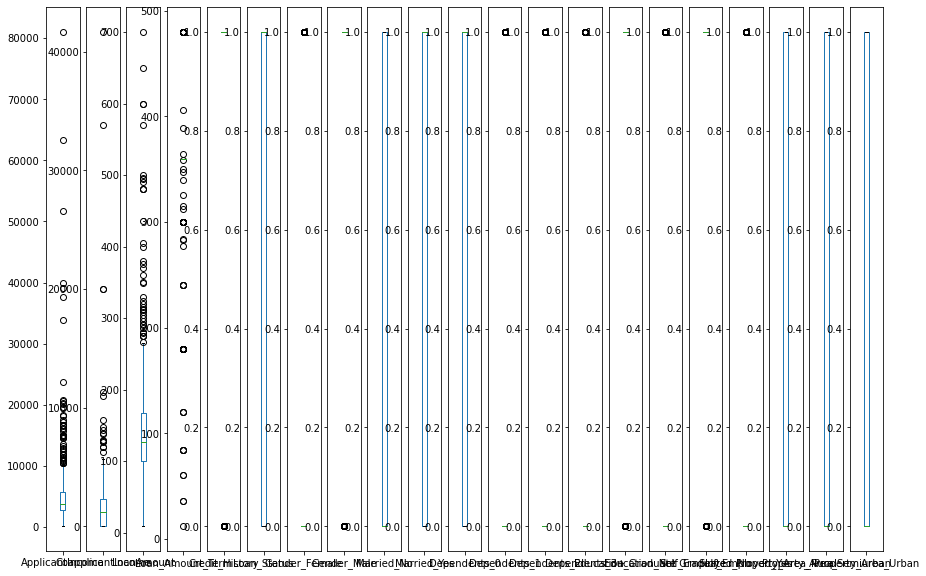

In [30]:
final_loan.plot(kind="box",subplots=True,figsize=(15,10))

##### using z score for treating the outliers

In [31]:
from scipy.stats import zscore

all_data = final_loan
z_score=abs(zscore(all_data))
print("Z Score is:-", "\n", z_score)
all_data = all_data.loc[(z_score<3).all(axis=1)]

Z Score is:- 
 [[0.07299082 0.55448733 0.43223057 ... 0.64147818 0.7820157  1.42814704]
 [0.13441195 0.03873155 0.20730409 ... 1.55889948 0.7820157  0.70020801]
 [0.39374734 0.55448733 0.9412747  ... 0.64147818 0.7820157  1.42814704]
 ...
 [0.43717437 0.47240418 1.27247537 ... 0.64147818 0.7820157  1.42814704]
 [0.35706382 0.55448733 0.49115182 ... 0.64147818 0.7820157  1.42814704]
 [0.13441195 0.55448733 0.14811291 ... 0.64147818 1.2787467  0.70020801]]


In [32]:
all_data.shape

(533, 21)

In [33]:
all_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,109,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128,360,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66,360,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120,360,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


## Model Building

##### Seperating the data

In [34]:
dx = all_data.drop(columns=["Loan_Status"])
y = all_data[["Loan_Status"]]

##### Now we do scaling by using MInMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,10))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

##### Spliting the data

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=19, stratify=y)

print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(426, 20) (107, 20)
(426, 1) (107, 1)


##### Importing the ML Models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

##### Appending all the models

In [38]:
lr=LogisticRegression()
sv=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gd=GradientBoostingClassifier()


# appending all models
models=[]
models.append(("LosgisticRgression",lr))
models.append(("SVC",sv))
models.append(("KNeighborsClassifier",knn))
models.append(("DecisionTreeClasssifier",dtc))
models.append(("GaussianNB",gnb))
models.append(("MultinomialNB",mnb))
models.append(("RandomForestClassifier",rf))
models.append(("AdaBoostClassifier",ada))
models.append(("GraddientBoostingClassifier",gd))

### Defining Model

In [39]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve,auc

Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("=========",name,"==========")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AC=accuracy_score(y_test,pred)
    print("Accuracy score :",AC)
    score.append(AC*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score:",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    cr=classification_report(y_test,pred)
    print("Classification report:", cr)
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print("Confusion matrix:\n",cm)
    print("\n")
    

========= LosgisticRgression ==========


LogisticRegression()


Accuracy score : 0.822429906542056


cross_val_score 0.770964360587002


roc_auc_score: 0.7540950040950041


Classification report:               precision    recall  f1-score   support

           0       0.79      0.58      0.67        33
           1       0.83      0.93      0.88        74

    accuracy                           0.82       107
   macro avg       0.81      0.75      0.77       107
weighted avg       0.82      0.82      0.81       107



Confusion matrix:
 [[19 14]
 [ 5 69]]


========= SVC ==========


SVC()


Accuracy score : 0.8317757009345794


cross_val_score 0.7785115303983229


roc_auc_score: 0.7776412776412777


Classification report:               precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.85      0.92      0.88        74

    accuracy                           0.83       107
   macro avg       0.81      0.78      0.79    

##### Let's Plot heatmap & auc roc curve for  LogissticRegression model, which is having highest accuracy 83.17 %

AxesSubplot(0.125,0.808774;0.62x0.0712264)


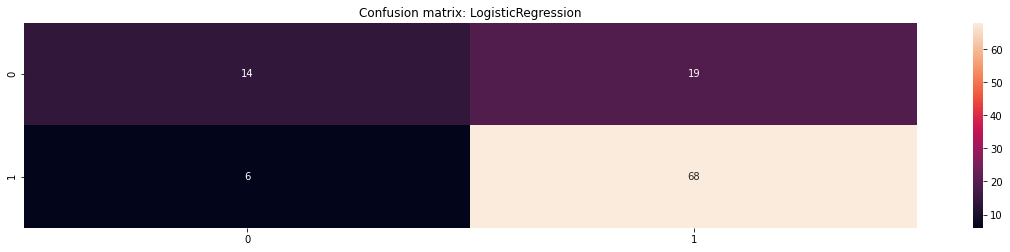

In [40]:
plt.figure(figsize=(20,40))
plt.subplot(911)
plt.title("Confusion matrix: LogisticRegression")
print(sns.heatmap(cm,annot=True))

##### Plotting ROC AUC Curve

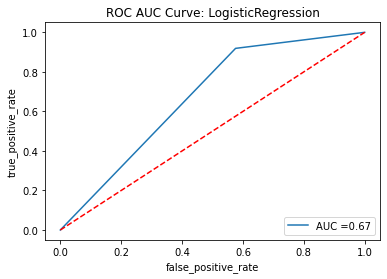

In [41]:
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title("ROC AUC Curve: LogisticRegression")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate, true_positive_rate,label="AUC =%0.2f" % roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")
print("\n\n")

### Over all result

##### In this we also calculate the roc_auc for every model

In [42]:
ovr_result = pd.DataFrame({"Model":Model,"Accuracy_score":score,"Cross_val_score":cvs,"Roc_Auc_Curve":rocscore})
ovr_result

,Model,Accuracy_score,Cross_val_score,Roc_Auc_Curve
0,LosgisticRgression,82.242991,77.096436,75.409500
1,SVC,83.177570,77.851153,77.764128
2,KNeighborsClassifier,76.635514,70.342418,65.479115
3,DecisionTreeClasssifier,71.028037,69.402516,66.461916
4,GaussianNB,76.635514,73.326345,73.034398
5,MultinomialNB,72.897196,65.262055,70.331695
6,RandomForestClassifier,72.897196,73.340321,63.615889
7,AdaBoostClassifier,77.570093,71.855346,69.512695
8,GraddientBoostingClassifier,76.635514,72.784766,67.158067


##### So Logistic regression model is best model with 83 %, now we will find out the best parameters for getting maximum score, using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
params = {"penalty":["l1","l2"], "C" :[0.001, 0.009, 0.01,0.09,1,5,10,15,18,19,20,25], "random_state":range(0,100)}

clf=GridSearchCV(lr,params,cv=5).fit(x,y)
clf.best_params_

{'C': 0.09, 'penalty': 'l2', 'random_state': 0}

### Again we build the model for LogisticRegression only with best parameters
##### We will plot heatmap as well as ROC AUC cruve also

Accuracy score :  0.8791208791208791
Cross_val_score :  0.770964360587002
ROC_AUC scor :  0.7975746268656716
Confusion matrix:
 [[15  9]
 [ 2 65]]
Classification report :
                precision    recall  f1-score   support

           0       0.88      0.62      0.73        24
           1       0.88      0.97      0.92        67

    accuracy                           0.88        91
   macro avg       0.88      0.80      0.83        91
weighted avg       0.88      0.88      0.87        91

AxesSubplot(0.125,0.808774;0.62x0.0712264)


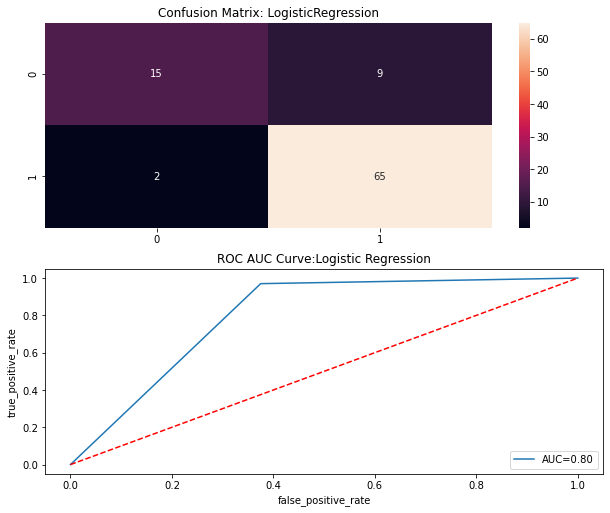

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.17,random_state=68)
lr=LogisticRegression(C=0.09, penalty="l2",random_state=0).fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print("Accuracy score : ", accuracy_score(y_test,lr_pred))
print("Cross_val_score : ", cross_val_score(lr, x,y,cv=10,scoring="accuracy").mean())
false_positive_rate, true_positive_rate, threshold=roc_curve(y_test,lr_pred)
print("ROC_AUC scor : ",auc(false_positive_rate,true_positive_rate))
print("Confusion matrix:\n", confusion_matrix(y_test,lr_pred))
print("Classification report :\n ", classification_report(y_test,lr_pred))

cm=confusion_matrix(y_test,lr_pred)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix: LogisticRegression")
print(sns.heatmap(cm,annot=True))
plt.subplot(912)

roc_auc = auc(false_positive_rate,true_positive_rate)
plt.title("ROC AUC Curve:Logistic Regression")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate, true_positive_rate, label="AUC=%0.2f"% roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc="lower right")

##### Let's see the actual and predicted values for Loan

In [45]:
print("Actual Status: \n ", y_test)
print("Predicted Status: \n ",lr_pred)

Actual Status: 
       Loan_Status
302            1
174            0
63             0
145            1
327            1
..           ...
612            1
603            1
587            1
53             0
269            1

[91 rows x 1 columns]
Predicted Status: 
  [1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


## Saving the Model 

##### we are going to save the Logistic Regression Model with 84% accuracy, using joblib to save the model

In [46]:
import joblib
joblib.dump(lr,"lr_Fraud_loan_prediction")

['lr_Fraud_loan_prediction']

# Conclusion
##### After running all the model on this data, we got max 84 % acccuracy with Logistic Regression Model. In other words we can say our model  with 88% will predict the correct values for predicting whether to give loan to a person or not
